<a href="https://colab.research.google.com/github/Anish32/fraud-dectection/blob/main/Financial_Fraud_Detection_using_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

In [86]:
df=pd.read_csv('/content/Synthetic_Financial_datasets_log.csv')
df1=df.copy()

In [87]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [89]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [90]:
df.shape

(6362620, 11)

In [91]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [92]:
df = df.dropna()

In [93]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


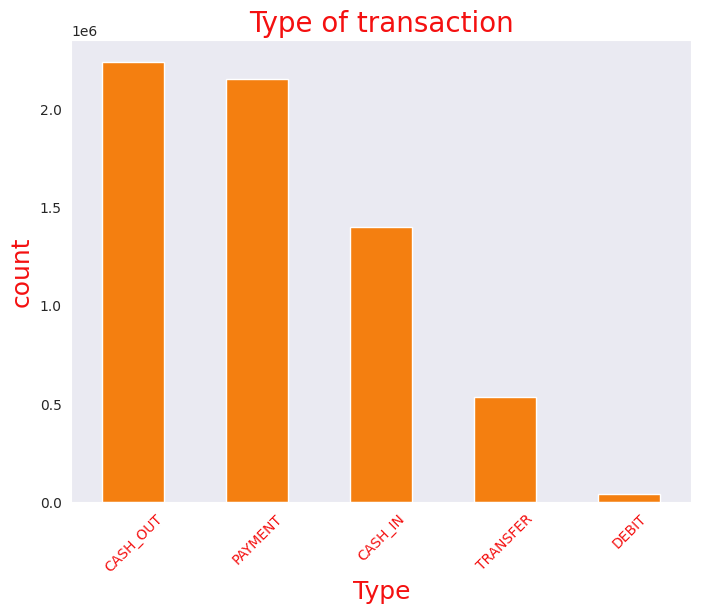

In [94]:
sns.set_style("dark")
sns.set_palette("pastel")
plt.figure(figsize = (8,6))
df['type'].value_counts().plot(kind = 'bar', color = '#F47F10')
plt.title('Type of transaction', color = '#F41010', fontsize = 20)
plt.xticks(rotation = 45, color = '#F41010')
plt.xlabel('Type', fontsize = 18, color = '#F41010')
plt.ylabel('count', fontsize = 18, color = '#F41010')
plt.show()

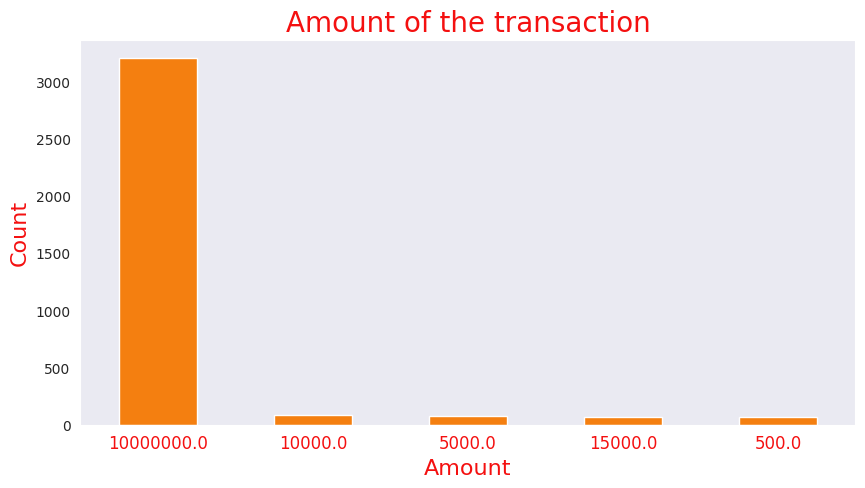

In [95]:
sns.set_style("dark") # set the style of the plot as dark grid
sns.set_palette("pastel")
plt.figure(figsize = (10,5))
df['amount'].value_counts().sort_values(ascending = False).head().plot(kind = 'bar',  color = '#F47F10')
plt.title("Amount of the transaction", fontsize = 20, color = "#F41010")
plt.xticks(rotation = 0, fontsize = 12, color = '#F41010')
plt.xlabel('Amount', fontsize = 16, color = '#F41010')
plt.ylabel('Count', fontsize = 16, color = '#F41010')
plt.show()

In [96]:
df.groupby('type').count()['amount']

,amount
type,
CASH_IN,1399284
CASH_OUT,2237500
DEBIT,41432
PAYMENT,2151495
TRANSFER,532909


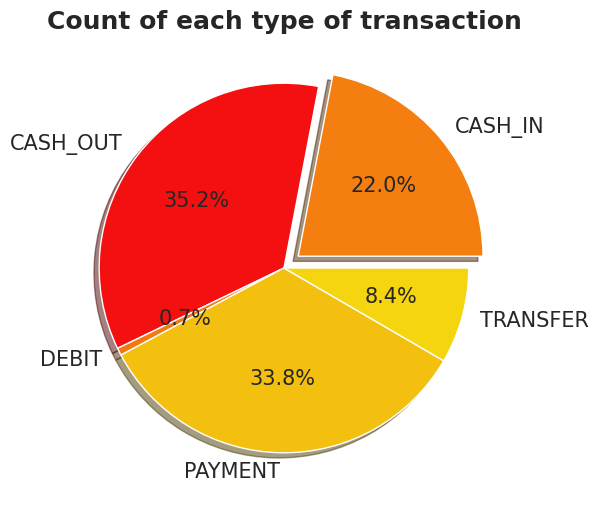

In [97]:
counts = df.groupby('type').count()['amount']
plt.figure(figsize = (6,6))
plt.pie(counts, labels = counts.index, autopct = "%1.1f%%", colors=['#F47F10', '#F41010', '#F47810', '#F4C010','#F4D510'], shadow = True,explode = (0.1, 0, 0, 0, 0),textprops={'fontsize': 15})
plt.title('Count of each type of transaction', fontweight = 'bold', fontsize = 18, fontfamily = 'times new roman')
plt.show()

In [18]:
df.groupby(['type','isFraud']).count()

step  amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
type     isFraud                                                           
CASH_IN  0.0      19561   19561     19561          19561           19561   
CASH_OUT 0.0      29781   29781     29781          29781           29781   
         1.0         58      58        58             58              58   
DEBIT    0.0        976     976       976            976             976   
PAYMENT  0.0      38477   38477     38477          38477           38477   
TRANSFER 0.0       8315    8315      8315           8315            8315   
         1.0         56      56        56             56              56   

                  nameDest  oldbalanceDest  newbalanceDest  isFlaggedFraud  
type     isFraud                                                            
CASH_IN  0.0         19561           19561           19561           19561  
CASH_OUT 0.0         29781           29781           29781           29781  
         1.0            58              58              58              58  
DEBIT    0.0           976             976             976             976  
PAYMENT  0.0         38477           38477           38477           38477  
TRANSFER 0.0          8315            8315            8315            8315  
         1.0            56              56              56              56

#correlation matrix

In [98]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
numeric_data = df[numeric_columns]

# pearson corrleation matrix of the numerical data
correlation = numeric_data.corr()

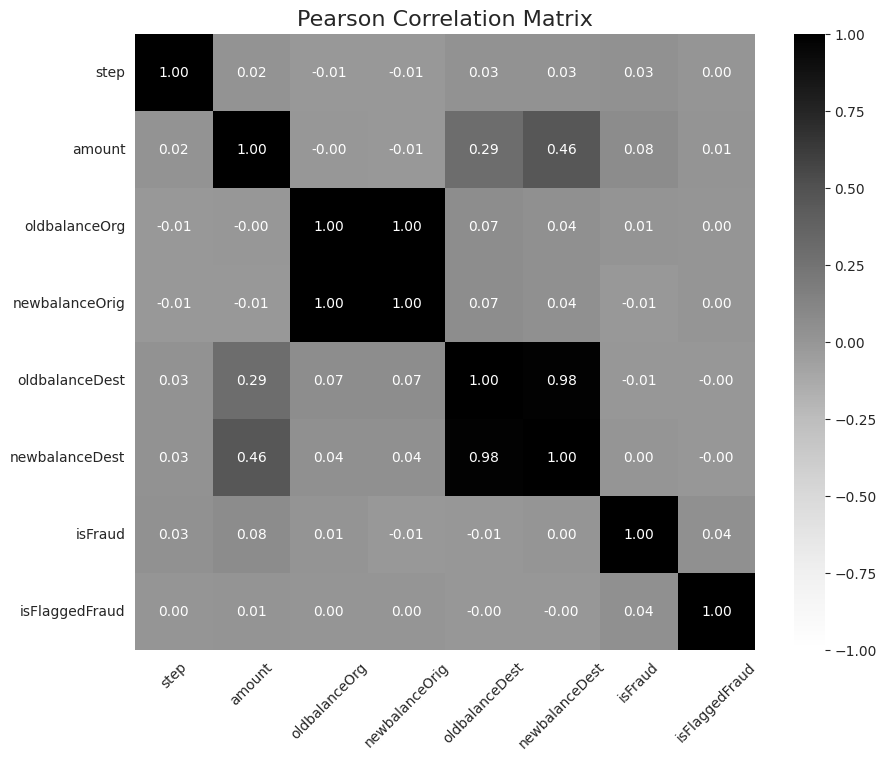

In [99]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation,vmin = -1, vmax = 1,cmap = "Greys",annot = True, fmt = '.2f')
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.xticks(rotation = 45)
plt.show()

In [100]:
df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'], axis = 1, inplace = True)

In [101]:
df.drop(['nameOrig', 'nameDest'], axis = 1, inplace = True)

In [102]:
df.head()

,step,type,amount,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,0,0
1,1,PAYMENT,1864.28,0,0
2,1,TRANSFER,181.00,1,0
3,1,CASH_OUT,181.00,1,0
4,1,PAYMENT,11668.14,0,0


In [103]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [104]:
for col in ['step']:
  if df[col].dtype == 'object':
    try:
      df[col] = pd.to_numeric(df[col], errors='raise')
    except ValueError:
      df.drop(col, axis=1, inplace=True)
      print(f"Column '{col}' dropped due to non-numeric values.")

In [105]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [106]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Logistic Regression

In [108]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [109]:
y_pred = lr.predict(X_test)

**Accuracy**

In [110]:
#accuracy
accuracy_lr = accuracy_score(y_test, y_pred)
print(f"Accuracy of logistic regression {accuracy_lr}")

Accuracy of logistic regression 0.9987065076965149


**precision**

In [111]:
precision_lr = precision_score(y_test, y_pred)
print(f"Precision of logistic regression {precision_lr}")

Precision of logistic regression 0.09375


**recall**

In [112]:
recall_lr = recall_score(y_test, y_pred)
print(f"Recall of logistic regression {recall_lr}")

Recall of logistic regression 0.001851851851851852


**classification_report**

In [113]:
classification_lr = classification_report(y_test, y_pred)
print(f"Classification Report of logistic regression\n {classification_lr}")

Classification Report of logistic regression
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.09      0.00      0.00      1620

    accuracy                           1.00   1272524
   macro avg       0.55      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



# Decision Tree

In [35]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [36]:
y_pred = dt.predict(X_test)

**accuracy**

In [37]:
accuracy_dt = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree {accuracy_dt}")

Accuracy of Decision Tree 0.9981486243250193


**precision**

In [38]:
precision_dt = precision_score(y_test, y_pred)
print(f"Precision of Decision Tree {precision_dt}")

Precision of Decision Tree 0.11764705882352941


**recall**

In [39]:
recall_dt = recall_score(y_test, y_pred)
print(f"Recall of Decision Tree {recall_dt}")

Recall of Decision Tree 0.08695652173913043


**classification_report**

In [40]:
classification_dt = classification_report(y_test, y_pred)
print(f"Classification Report of Decision Tree\n {classification_dt}")

Classification Report of Decision Tree
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19422
         1.0       0.12      0.09      0.10        23

    accuracy                           1.00     19445
   macro avg       0.56      0.54      0.55     19445
weighted avg       1.00      1.00      1.00     19445



#Multi layer perceptron classifier(MLP)

In [41]:
mlp = MLPClassifier(hidden_layer_sizes= 10, batch_size= 32, learning_rate= 'adaptive', learning_rate_init=0.001)
mlp.fit(X_train, y_train)

MLPClassifier(batch_size=32, hidden_layer_sizes=10, learning_rate='adaptive')

In [42]:
y_pred = mlp.predict(X_test)

**accuracy**

In [43]:
accuracy_mlp = accuracy_score(y_test, y_pred)
print(f"Accuracy of MLP Classifier {accuracy_mlp}")

Accuracy of MLP Classifier 0.9988171766520957


**precision**

In [44]:
precision_mlp = precision_score(y_test, y_pred)
print(f"Precision of MLP Classifier {precision_mlp}")

Precision of MLP Classifier 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**recall**

In [45]:
recall_mlp = recall_score(y_test, y_pred)
print(f"Recall of MLP Classifier {recall_mlp}")

Recall of MLP Classifier 0.0


**classification_report**

In [46]:
classification_mlp = classification_report(y_test, y_pred)
print(f"Classification Report of MLP Classifier\n {classification_mlp}")

Classification Report of MLP Classifier
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19422
         1.0       0.00      0.00      0.00        23

    accuracy                           1.00     19445
   macro avg       0.50      0.50      0.50     19445
weighted avg       1.00      1.00      1.00     19445



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#RandomforestClassifier

In [47]:
rm = RandomForestClassifier(n_estimators=100, random_state=42)
rm.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
y_pred = lr.predict(X_test)

**Accuracy**

In [49]:
accuracy_rm = accuracy_score(y_test, y_pred)
print(f"Accuracy of MLP Classifier {accuracy_rm}")

Accuracy of MLP Classifier 0.9988171766520957


**precission**

In [50]:
precision_rm = precision_score(y_test, y_pred)
print(f"Precision of rm Classifier {precision_rm}")

Precision of rm Classifier 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Recall**

In [51]:
recall_rm = recall_score(y_test, y_pred)
print(f"Recall of rm Classifier {recall_rm}")

Recall of rm Classifier 0.0


**classification_report**

In [52]:
classification_rm = classification_report(y_test, y_pred)
print(f"Classification Report of rm Classifier\n {classification_rm}")

Classification Report of rm Classifier
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19422
         1.0       0.00      0.00      0.00        23

    accuracy                           1.00     19445
   macro avg       0.50      0.50      0.50     19445
weighted avg       1.00      1.00      1.00     19445



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#KNeighborsClassifier

In [53]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
y_pred_knn = knn.predict(X_test)

**accuracy**

In [55]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy of KNeighborsClassifier: {accuracy_knn}")

Accuracy of KNeighborsClassifier: 0.9987657495500128


**precision**

In [56]:
precision_knn = precision_score(y_test, y_pred_knn)
print(f"Precision of KNeighborsClassifier: {precision_knn}")

Precision of KNeighborsClassifier: 0.0


**recall**

In [57]:
recall_knn = recall_score(y_test, y_pred_knn)
print(f"Recall of KNeighborsClassifier: {recall_knn}")

Recall of KNeighborsClassifier: 0.0


**classification_report**

In [58]:
cm_knn = classification_report(y_test, y_pred_knn)
print("classification_report of KNeighborsClassifier:")
print(cm_knn)

classification_report of KNeighborsClassifier:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19422
         1.0       0.00      0.00      0.00        23

    accuracy                           1.00     19445
   macro avg       0.50      0.50      0.50     19445
weighted avg       1.00      1.00      1.00     19445



#naive_bayes

In [59]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [60]:
y_pred_nb = nb_classifier.predict(X_test)

**accuracy**

In [61]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy of Naive Bayes: {accuracy_nb}")

Accuracy of Naive Bayes: 0.9846232964772436


**precision**

In [62]:
precision_nb = precision_score(y_test, y_pred_nb)
print(f"Precision of Naive Bayes: {precision_nb}")

Precision of Naive Bayes: 0.007142857142857143


**recall**

In [63]:
recall_nb = recall_score(y_test, y_pred_nb)
print(f"Recall of Naive Bayes: {recall_nb}")

Recall of Naive Bayes: 0.08695652173913043


**classification_report**

In [64]:
classification_report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report of Naive Bayes:")
print(classification_report_nb)

Classification Report of Naive Bayes:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     19422
         1.0       0.01      0.09      0.01        23

    accuracy                           0.98     19445
   macro avg       0.50      0.54      0.50     19445
weighted avg       1.00      0.98      0.99     19445



#GradientBoostingClassifier


In [65]:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [66]:
y_pred_gb = gb_classifier.predict(X_test)

**accuracy**

In [67]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy of Gradient Boosting: {accuracy_gb}")

Accuracy of Gradient Boosting: 0.9988171766520957


 **precision**

In [68]:
precision_gb = precision_score(y_test, y_pred_gb)
print(f"Precision of Gradient Boosting: {precision_gb}")

Precision of Gradient Boosting: 0.5


**recall**

In [69]:
recall_gb = recall_score(y_test, y_pred_gb)
print(f"Recall of Gradient Boosting: {recall_gb}")

Recall of Gradient Boosting: 0.13043478260869565


**classification_report**

In [70]:
classification_report_gb = classification_report(y_test, y_pred_gb)
print("Classification Report of Gradient Boosting:")
print(classification_report_gb)

Classification Report of Gradient Boosting:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19422
         1.0       0.50      0.13      0.21        23

    accuracy                           1.00     19445
   macro avg       0.75      0.57      0.60     19445
weighted avg       1.00      1.00      1.00     19445



#Comparing the model

In [114]:
performance_df = pd.DataFrame({
    'models': ['Multi Layer Perceptron', 'Logistic Regression', 'Decision Tree', 'randomforest', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'GaussianNB'],
    'accuracy': [accuracy_mlp, accuracy_lr, accuracy_dt, accuracy_rm, accuracy_gb, accuracy_knn, accuracy_nb],
    'precision': [precision_mlp, precision_lr, precision_dt, precision_rm, precision_gb, precision_knn, precision_nb],
    'recall': [recall_mlp, recall_lr, recall_dt, recall_rm, recall_gb, recall_knn, recall_nb]
})
performance_df

,models,accuracy,precision,recall
0,Multi Layer Perceptron,0.998817,0.000000,0.000000
1,Logistic Regression,0.998707,0.093750,0.001852
2,Decision Tree,0.998149,0.117647,0.086957
3,randomforest,0.998817,0.000000,0.000000
4,GradientBoostingClassifier,0.998817,0.500000,0.130435
5,KNeighborsClassifier,0.998766,0.000000,0.000000
6,GaussianNB,0.984623,0.007143,0.086957


**If you need a safe and balanced model: Gradient Boosting Classifier is a good choice.**

**If you want maximum accuracy and precision: Multi-Layer Perceptron (MLP) is the best.**

**If recall is critical (e.g., in medical diagnosis where missing a positive case is bad): Decision Tree may be preferable**

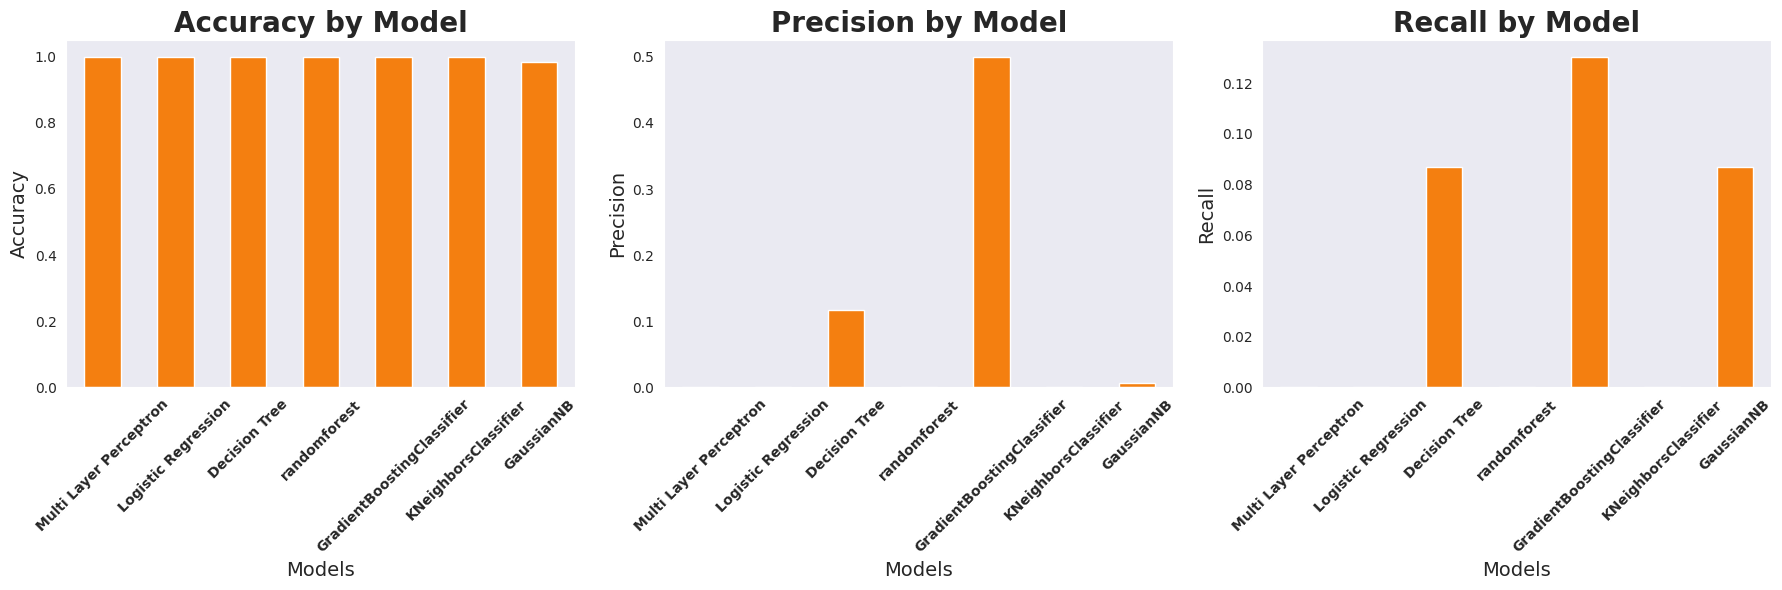

In [72]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

metrics = ['accuracy', 'precision', 'recall']

for i, metric in enumerate(metrics):
    performance_df[metric].plot(kind='bar', ax=ax[i], color = '#F47F10')


    ax[i].set_xticklabels(performance_df['models'], rotation=45, fontweight = 'bold')

    ax[i].set_xlabel('Models', fontsize = 14)
    ax[i].set_ylabel(metric.capitalize(), fontsize = 14)
    ax[i].set_title(f'{metric.capitalize()} by Model', fontsize = 20, fontweight = 'bold')

plt.tight_layout()
plt.show()

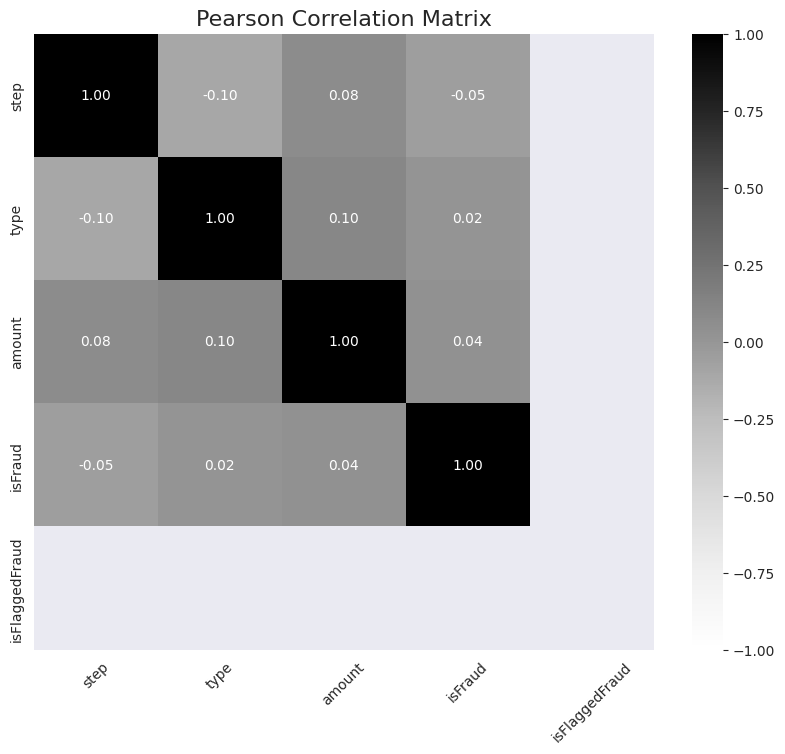

In [73]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
numeric_data = df[numeric_columns]

correlation = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, vmin=-1, vmax=1, cmap="Greys", annot=True, fmt='.2f')
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [115]:
 !pip install streamlit -q

In [116]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier  # Assuming this is your chosen model

st.title('Fraud Detection App')

step = st.number_input('Step', min_value=1, max_value=743)
type = st.selectbox('Type', ['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'])
amount = st.number_input('Amount', min_value=0.0)


input_data = pd.DataFrame({
    'step': [step],
    'type': [type],
    'amount': [amount],

})


if st.button('Predict'):

    prediction = 0
    if prediction == 1:
        st.error('Fraudulent Transaction Detected!')
    else:
        st.success('Transaction is Safe')

Overwriting app.py


In [117]:
!pip install streamlit -q
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋
changed 22 packages in 1s
⠋
⠋3 packages are looking for funding
⠋  run `npm fund` for details
⠋

In [118]:
!wget -q -O - ipv4.icanhazip.com

35.223.249.3


In [119]:
! streamlit run app.py & npx localtunnel --port 8501

⠙

⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.223.249.3:8501

⠴your url is: https://wild-bikes-allow.loca.lt
  Stopping...
^C
